### Importing Libraries

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### Loading Dataset

In [202]:
df=pd.read_csv('winequality-red.csv')

In [203]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [204]:
df.shape

(1599, 12)

In [205]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [207]:
df.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Categorization of the target variable 

In [208]:
df['quality'].isnull().sum()

0

In [209]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [210]:
def change_value(value):
    if value in [3,4]:
        return "Low"
    elif value in [5,6]:
        return "Medium"
    else:
        return "High"
    

In [211]:
df['quality']=df['quality'].apply(change_value)

In [212]:
df['quality'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [213]:
df['quality'].isnull().sum()

0

### Exploratory Data Analysis

In [187]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [214]:
df.duplicated().sum()

240

In [231]:
df.drop_duplicates(keep='first',inplace=True)
df.reset_index(drop=True, inplace=True)

In [216]:
df.duplicated().sum()

0

In [191]:
features=df.columns[:-1]
features

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

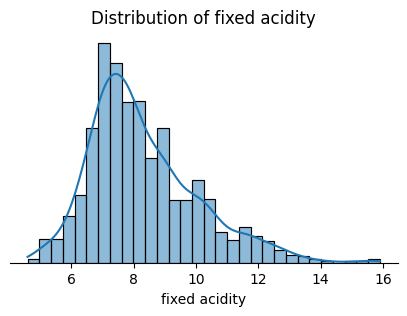

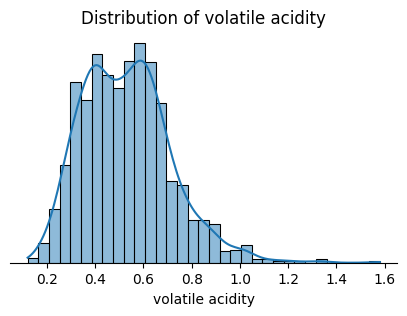

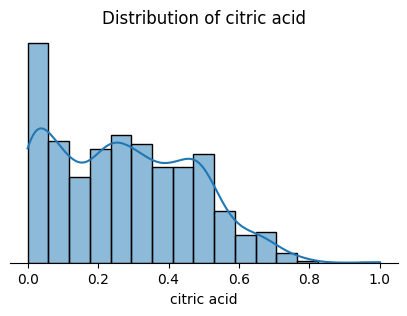

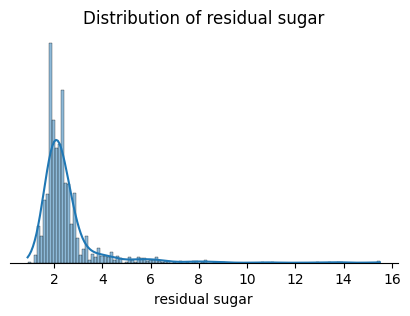

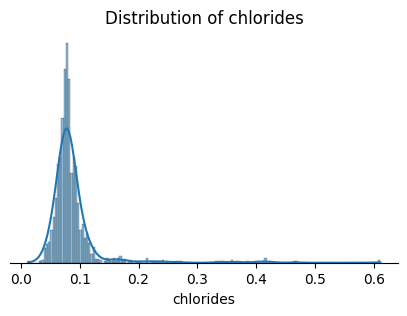

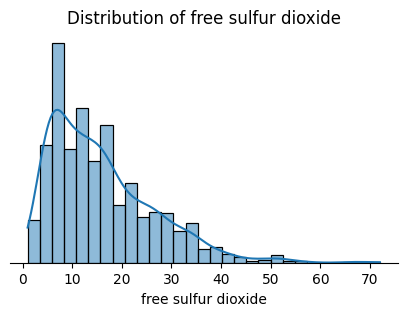

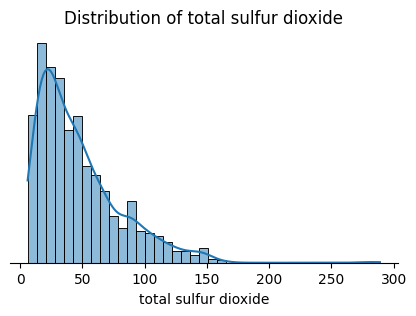

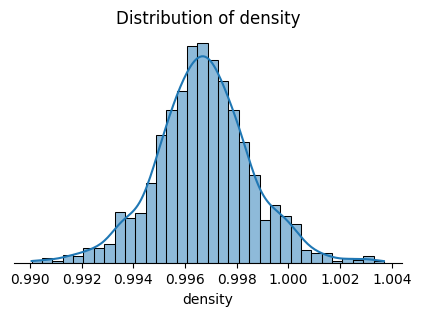

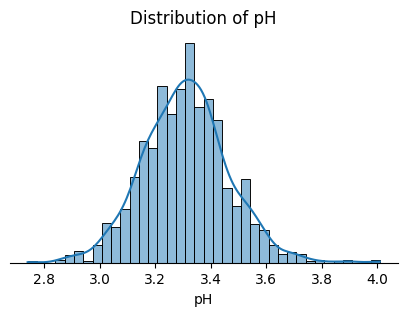

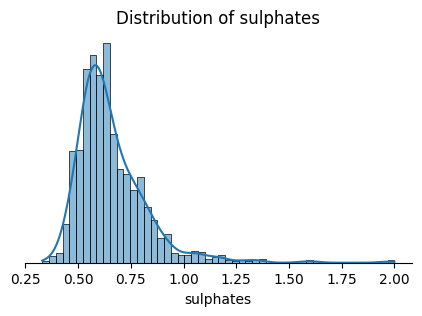

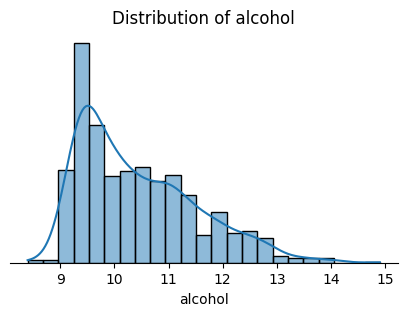

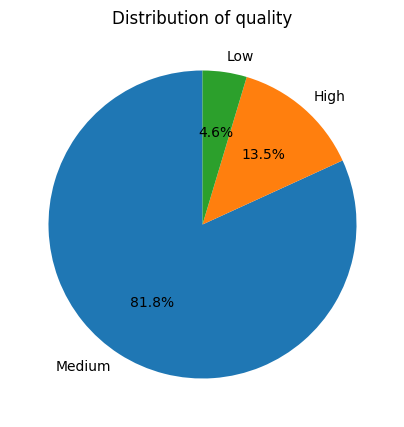

In [121]:
#Checking the distribution of the each numerical feature
for feature in df.columns:
    if (df[feature].dtype !='object') & (df[feature].dtype  != 'category'):
        plt.figure(figsize=(5,3))
        sns.histplot(df[feature],kde=-True)
        ax=plt.gca()
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        plt.yticks([])
        plt.ylabel('')
        plt.title(f'Distribution of {feature}')
        plt.show()
    else:
        grouped=pd.Series(df['quality'].value_counts())
        plt.figure(figsize=(5,5))
        plt.pie(grouped,labels=grouped.index,autopct='%1.1f%%',startangle=90)
        plt.title(f"Distribution of {feature}")
        plt.yticks([])
        plt.ylabel('')
        plt.xticks([])
        plt.xlabel('')
        plt.show()

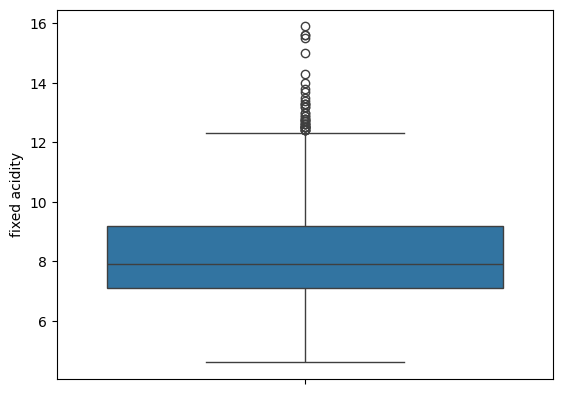

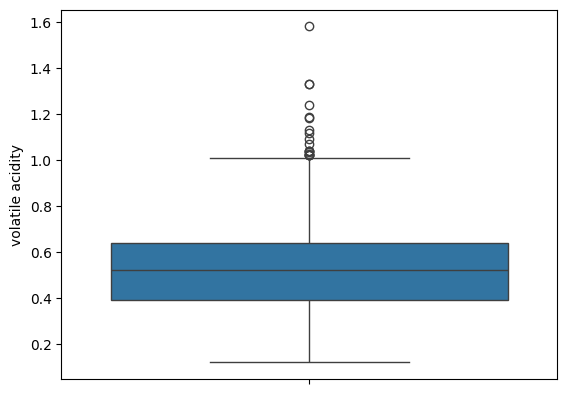

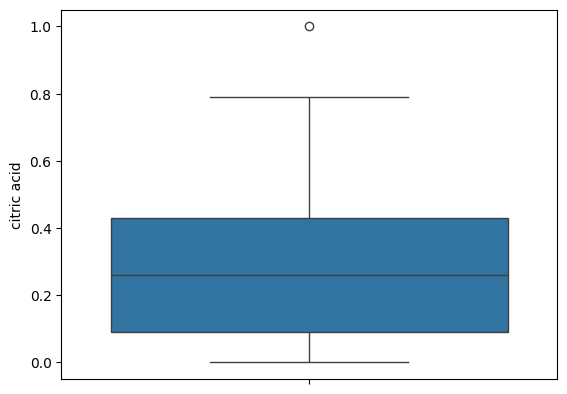

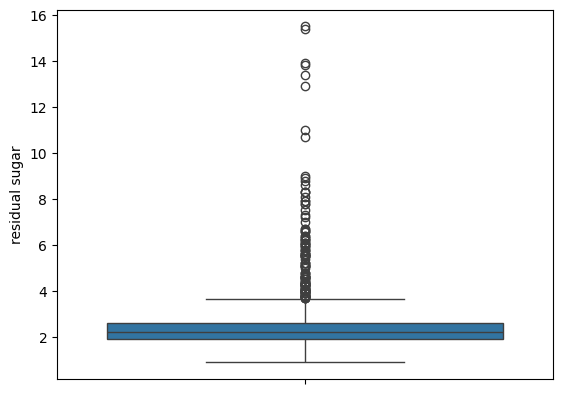

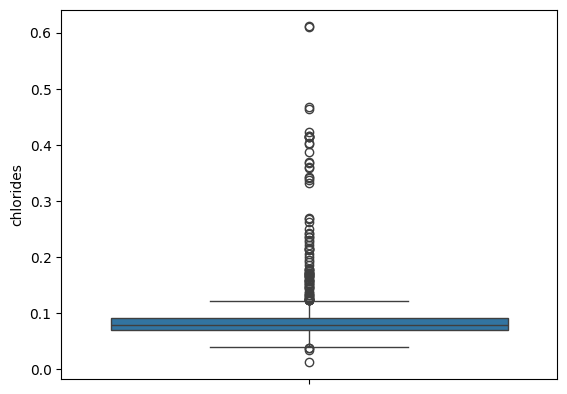

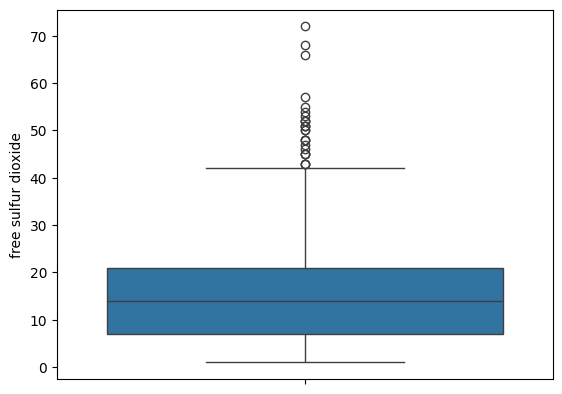

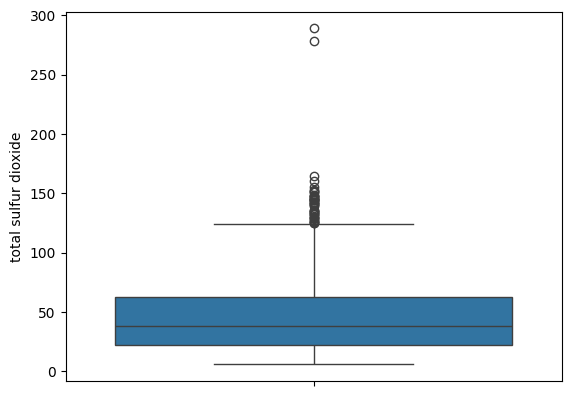

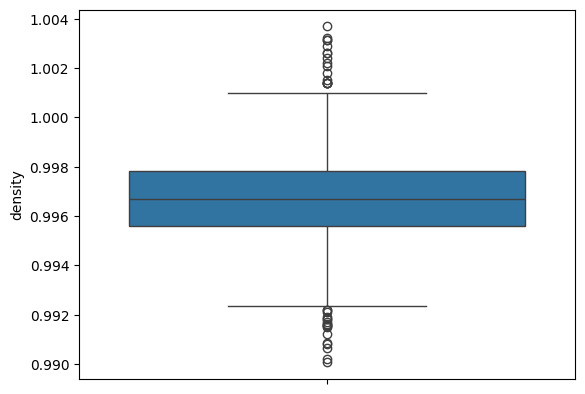

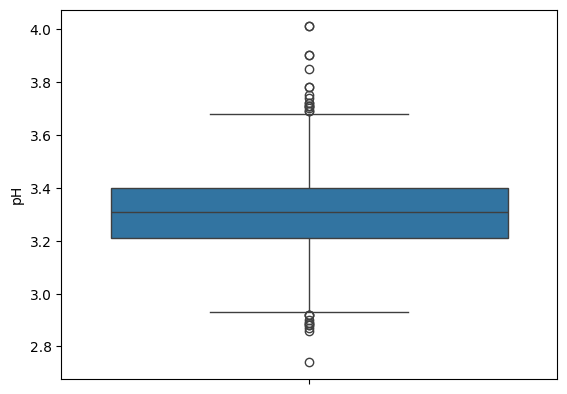

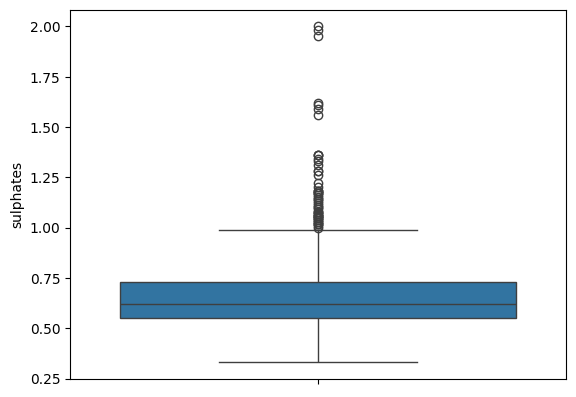

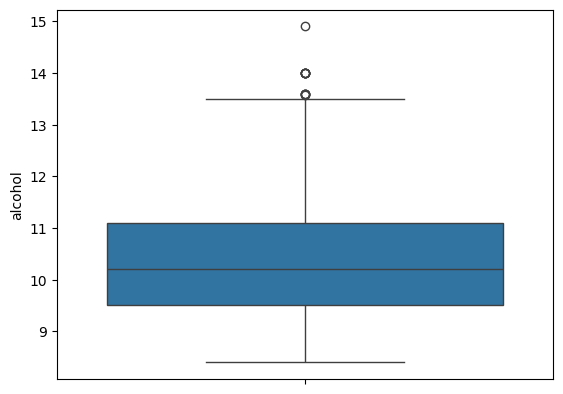

In [122]:
# Outliers detection 
for feature in features:
    if (df[feature].dtype !='object') & (df[feature].dtype  != 'category'):
        sns.boxplot(df[feature])
        plt.show()

In [192]:
#Checking the stats summary i.e mean,median,skew,kurtosis
stats_summary=['mean','median','skewness','kurtosis']
numerical_features=[feature for feature in features if (df[feature].dtype !='object') & (df[feature].dtype  != 'category')]
stats_summary_df=pd.DataFrame(columns=stats_summary,index=numerical_features)
for feature in numerical_features:
    mean=df[feature].mean()
    median=df[feature].median()
    skewness=df[feature].skew()
    kurtosis=df[feature].kurt()
    stats_summary_df.loc[feature]=[mean,median,skewness,kurtosis]

In [193]:
stats_summary_df

,mean,median,skewness,kurtosis
fixed acidity,8.310596,7.9,0.941041,1.049673
volatile acidity,0.529478,0.52,0.729279,1.249243
citric acid,0.272333,0.26,0.312726,-0.788921
residual sugar,2.5234,2.2,4.548153,29.364592
chlorides,0.088124,0.079,5.502487,38.624653
free sulfur dioxide,15.893304,14.0,1.226579,1.892691
total sulfur dioxide,46.825975,38.0,1.540368,4.042257
density,0.996709,0.9967,0.044778,0.830659
pH,3.309787,3.31,0.232032,0.87979
sulphates,0.658705,0.62,2.406505,11.102282


In [195]:
#checking the correlation between the columns
corr=df.corr(numeric_only=True)
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621


<Axes: >

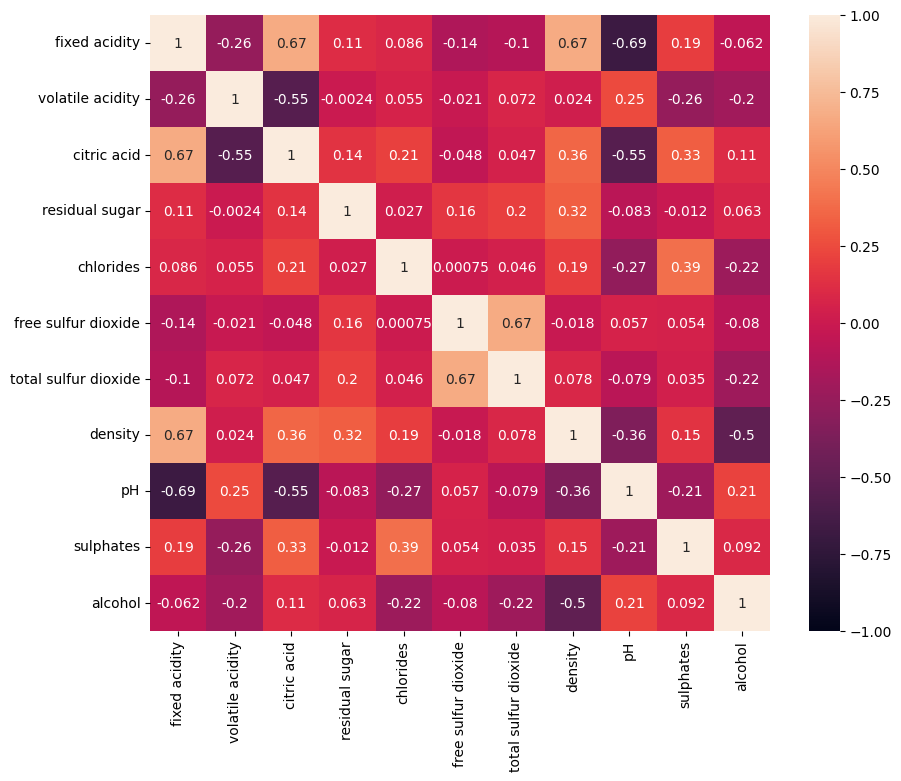

In [196]:
#Visualisation of the correlation
plt.figure(figsize=(10,8))
sns.heatmap(corr,
           annot=True,
           vmin=-1,
           vmax=1)

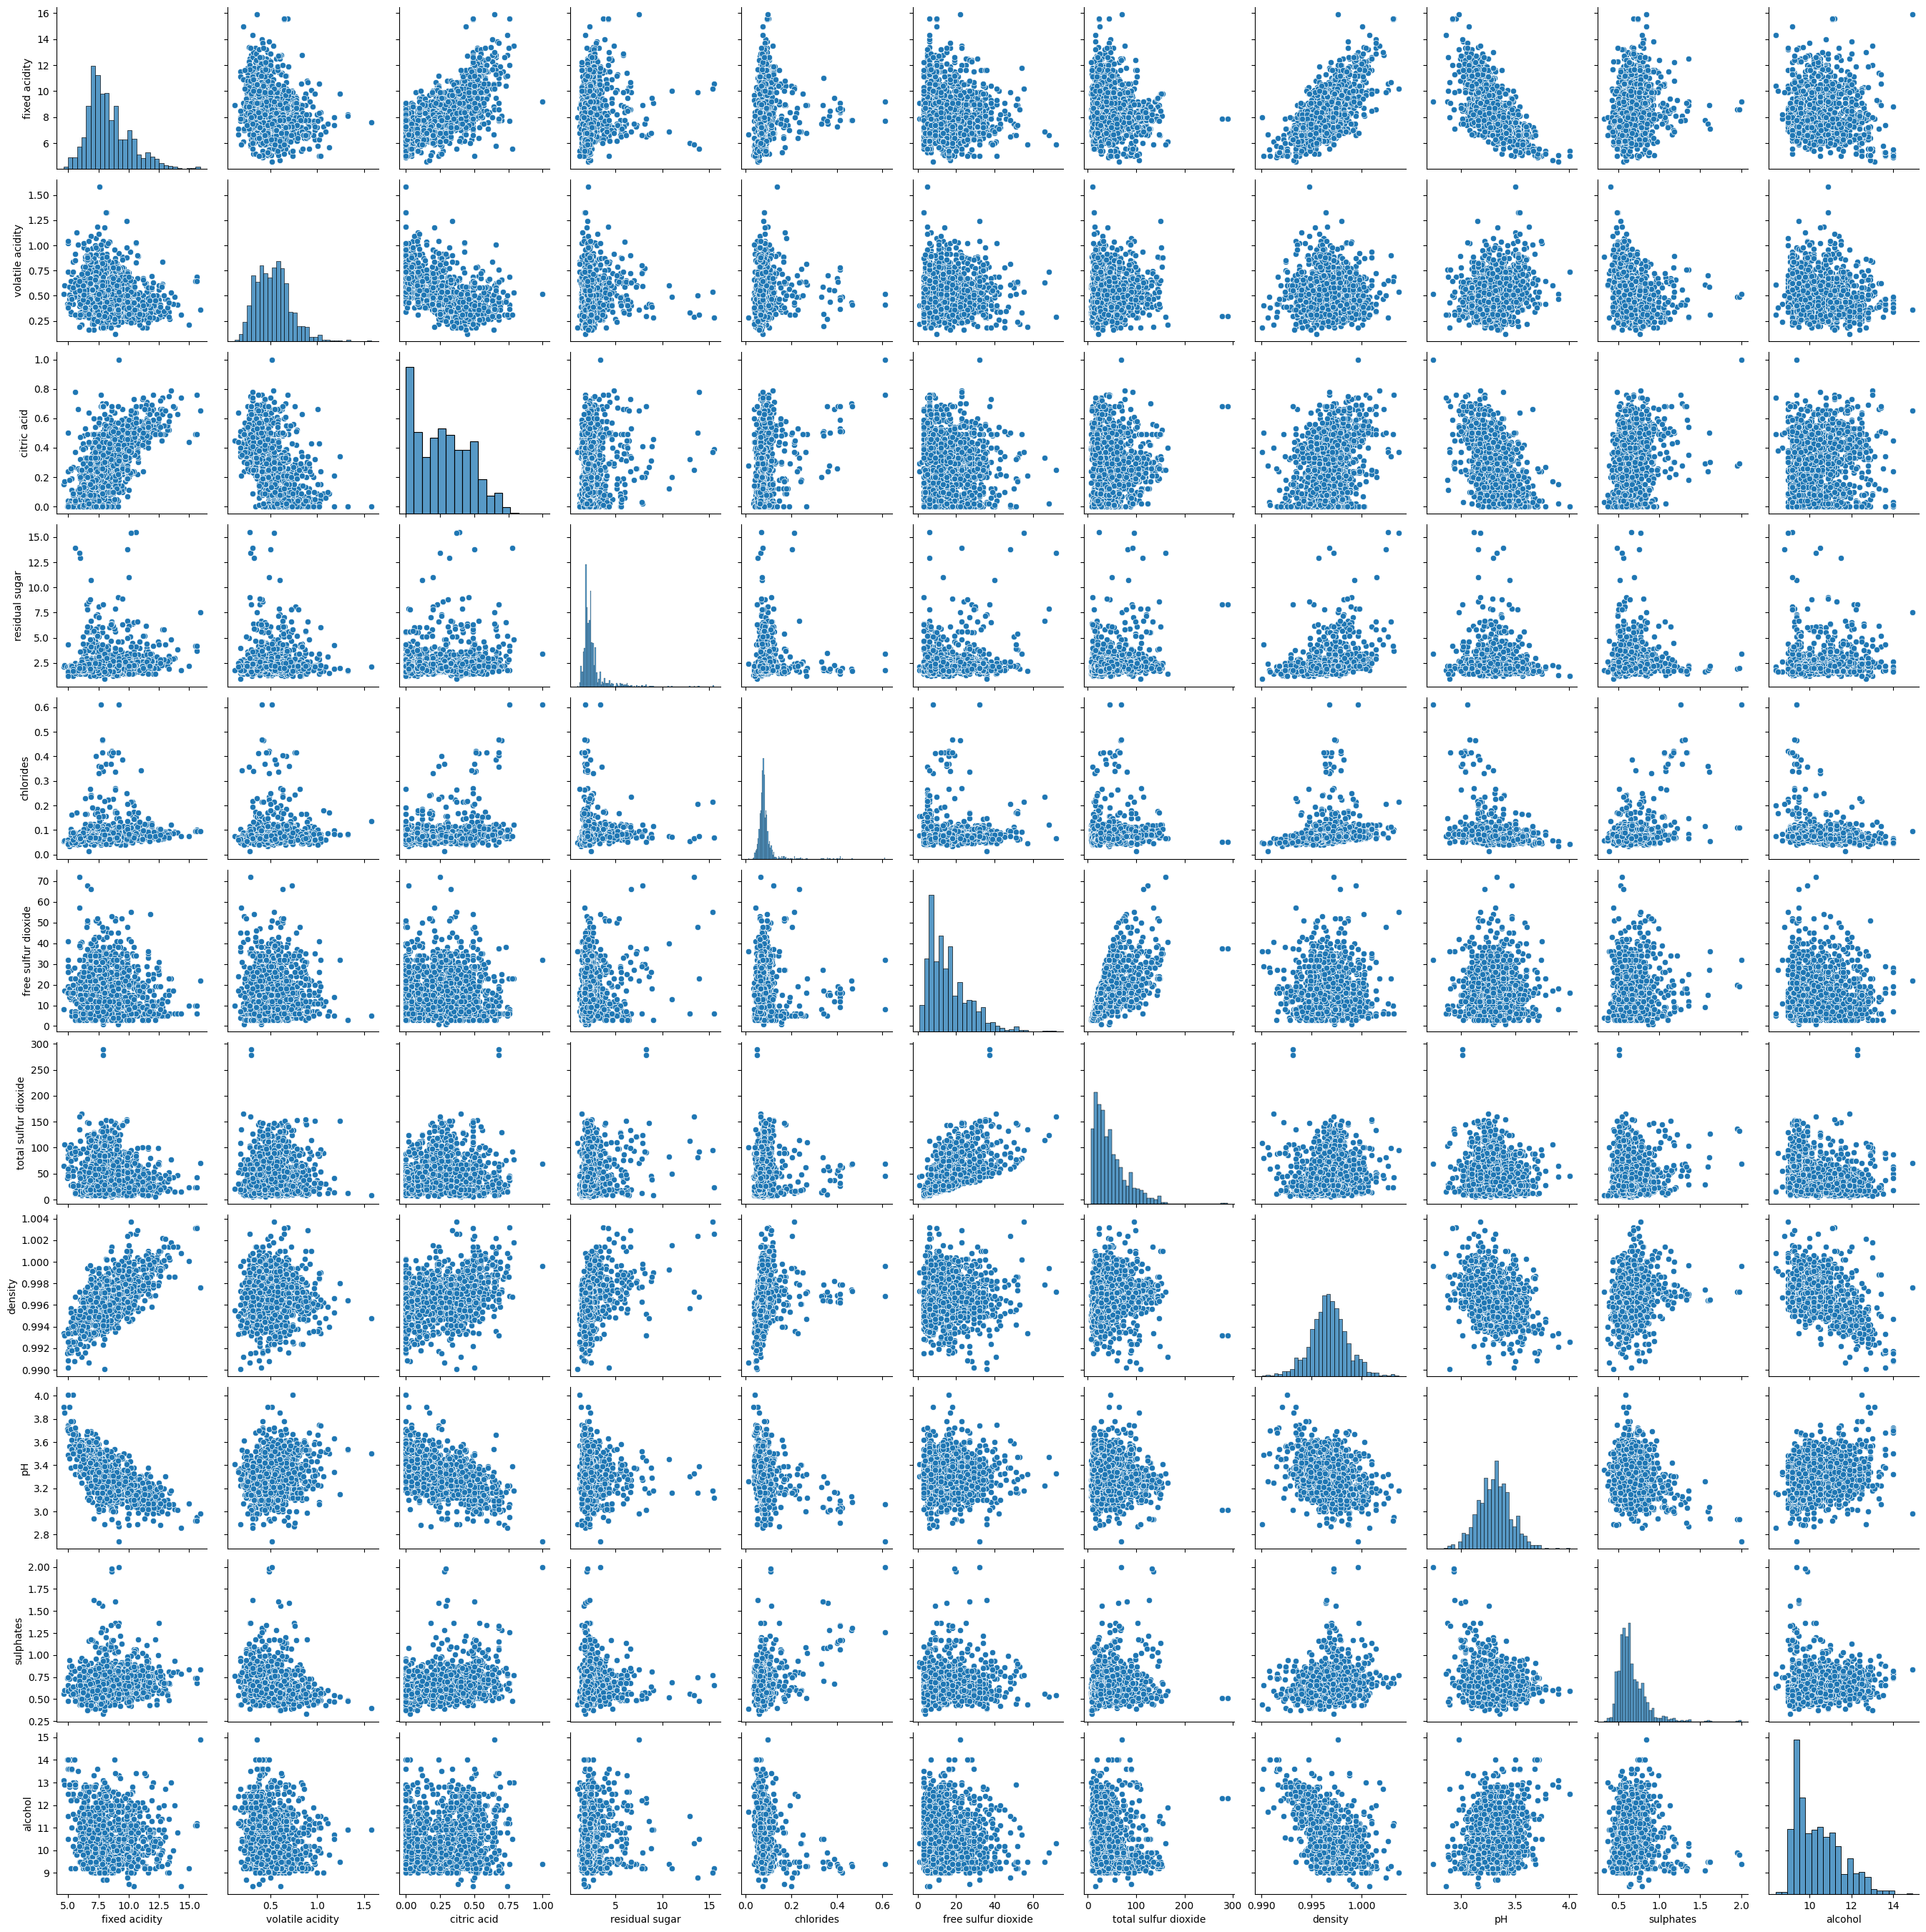

In [127]:
sns.pairplot(df)

In [161]:
#VIF calculation - Checking for multi collinearity
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df[features]
x=sm.add_constant(x)
vif_df=pd.DataFrame()
vif_df['features']=x.columns
vif_df['VIF_value']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif_df

,features,VIF_value
0,const,1.728334e+06
1,fixed acidity,7.880951e+00
2,volatile acidity,1.777884e+00
3,citric acid,3.124679e+00
4,residual sugar,1.641987e+00
5,chlorides,1.530769e+00
6,free sulfur dioxide,1.950922e+00
7,total sulfur dioxide,2.216688e+00
8,density,6.281009e+00
9,pH,3.397407e+00


In [198]:
print(df[['fixed acidity','density']].isna().sum())

fixed acidity    0
density          0
dtype: int64


In [232]:
#PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
high_vif_df=df[['fixed acidity','density']]
sc=StandardScaler()
high_vif_df=sc.fit_transform(high_vif_df)
pca=PCA(n_components=1)
component=pca.fit_transform(high_vif_df)
com_df=pd.DataFrame(component,columns=['acidity_density_PC'])
new_df=df.drop(columns=['fixed acidity','density'])

In [235]:
new_df=pd.concat([com_df,new_df],axis='columns')

In [236]:
new_df.head()

,acidity_density_PC,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,0.042124,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,Medium
1,-0.173471,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,Medium
2,-0.097773,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,Medium
3,1.665324,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,Medium
4,0.042124,0.66,0.00,1.8,0.075,13.0,40.0,3.51,0.56,9.4,Medium


In [237]:
#Reassigning this new_df to our original df
df=new_df

In [238]:
df.head()

,acidity_density_PC,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,0.042124,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,Medium
1,-0.173471,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,Medium
2,-0.097773,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,Medium
3,1.665324,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,Medium
4,0.042124,0.66,0.00,1.8,0.075,13.0,40.0,3.51,0.56,9.4,Medium


### Splitting of the dataset

In [241]:
from sklearn.model_selection import train_test_split
x=df.drop(columns='quality')
y=df['quality']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [242]:
print(f" Training => features : {X_train.shape},Target :{y_train.shape}")
print(f" Testing => features: {X_test.shape},Target:{y_test.shape}")

 Training => features : (951, 10),Target :(951,)
 Testing => features: (408, 10),Target:(408,)


### Encoding of the data

In [246]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
y_train=encoder.fit_transform(y_train.values.reshape(-1,1))
y_test=encoder.transform(y_test.values.reshape(-1,1))

In [249]:
encoder.categories_

[array(['High', 'Low', 'Medium'], dtype=object)]

### Handling the dataset

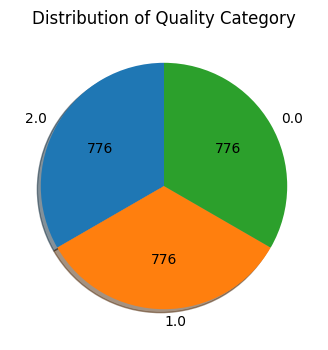

In [267]:
#Count occurrences of each category
categories = pd.Series(y_train.squeeze()).value_counts()
# Plot pie chart with counts
plt.figure(figsize=(4,4))
plt.pie(
    categories.values, 
    labels=categories.index, 
    startangle=90, 
    autopct=lambda pct: f'{int(round(pct/100.*categories.sum()))}',  # Show counts
    shadow=True
)
plt.title('Distribution of Quality Category')
plt.show()

In [266]:
from imblearn.over_sampling import  SMOTE
smote=SMOTE()
X_train,y_train=smote.fit_resample(X_train,y_train)

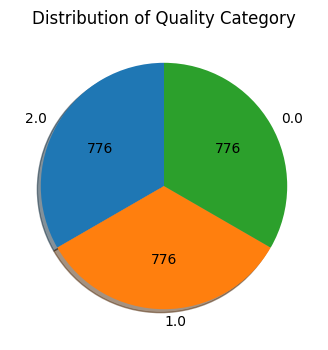

In [268]:
#Count occurrences of each category
categories = pd.Series(y_train.squeeze()).value_counts()
# Plot pie chart with counts
plt.figure(figsize=(4,4))
plt.pie(
    categories.values, 
    labels=categories.index, 
    startangle=90, 
    autopct=lambda pct: f'{int(round(pct/100.*categories.sum()))}',  # Show counts
    shadow=True
)
plt.title('Distribution of Quality Category')
plt.show()

### Random Forest Classifier

In [270]:
from sklearn.ensemble import RandomForestClassifier

In [289]:
model=RandomForestClassifier(random_state=42,n_estimators=50)

In [290]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [291]:
predicted=model.predict(X_test)

In [292]:
#Evaluating the model
from sklearn.metrics import confusion_matrix,classification_report
matrix=confusion_matrix(y_test,predicted)
report=classification_report(y_test,predicted)

In [293]:
print(report)

              precision    recall  f1-score   support

         0.0       0.45      0.69      0.54        54
         1.0       0.38      0.56      0.45        18
         2.0       0.92      0.82      0.86       336

    accuracy                           0.79       408
   macro avg       0.58      0.69      0.62       408
weighted avg       0.83      0.79      0.80       408



<Axes: >

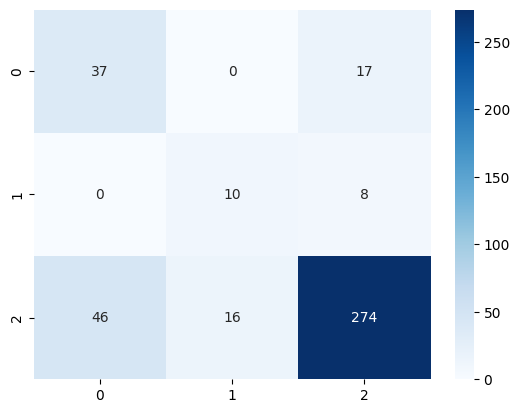

In [294]:
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')

In [295]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, predicted, average='micro')  # use 'macro' or 'micro' for multiclass
print("Precision:", precision)

# Recall
recall = recall_score(y_test, predicted, average='micro')
print("Recall:", recall)

# F1-Score
f1 = f1_score(y_test, predicted, average='micro')
print("F1-Score:", f1)


Accuracy: 0.7867647058823529
Precision: 0.7867647058823529
Recall: 0.7867647058823529
F1-Score: 0.7867647058823529


### Hyper Parameter Tuning - Grid Search CV

In [296]:
param_grid = {
    'n_estimators': [50, 100,150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'criterion': ['gini', 'entropy']
}

In [297]:
from sklearn.metrics import make_scorer, f1_score
scorer = make_scorer(f1_score, average='weighted')

In [298]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,       # 5-fold cross-validation
    n_jobs=-1,  # use all CPU cores
    verbose=2
)

In [299]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=50, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring=make_scorer(f1_score, response_method='predict', average=weighted),
             verbose=2)

In [300]:
print("Best Parameters:", grid_search.best_params_)
print("Best F1-Score (CV):", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best F1-Score (CV): 0.9139725289312157


In [301]:
best_model=grid_search.best_estimator_

In [302]:
y_pred=best_model.predict(X_test)

<Axes: >

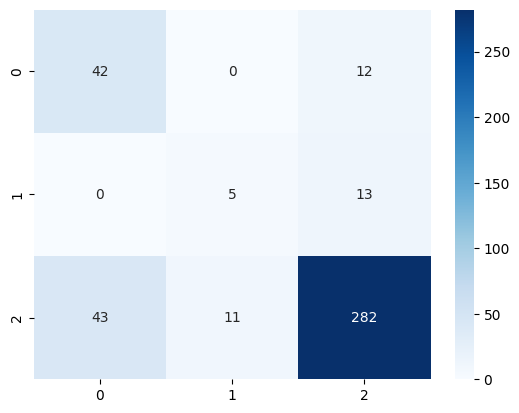

In [303]:
#confusion matrix
matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')

In [304]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='micro')  # use 'macro' or 'micro' for multiclass
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred, average='micro')
print("Recall:", recall)

# F1-Score
f1 = f1_score(y_test, y_pred, average='micro')
print("F1-Score:", f1)

Accuracy: 0.8063725490196079
Precision: 0.8063725490196079
Recall: 0.8063725490196079
F1-Score: 0.8063725490196079


### ROC_CURVE

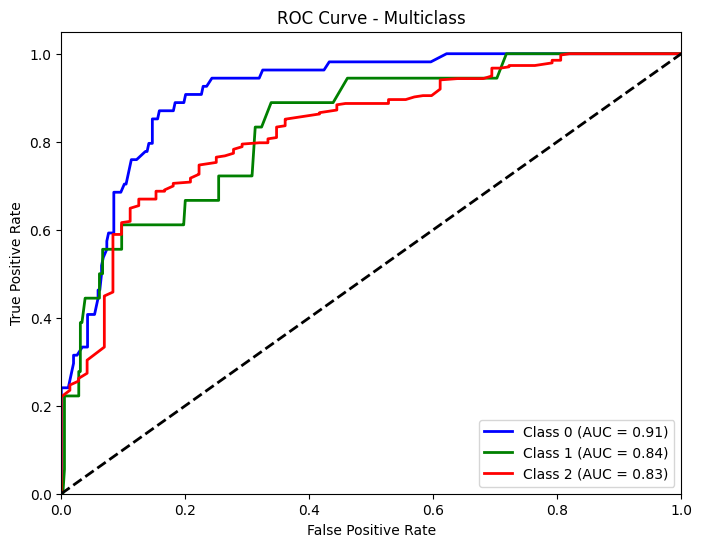

In [306]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
y_prob = best_model.predict_proba(X_test)
# Binarize the labels for multiclass
# Assuming classes are 0, 1, 2
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Initialize dictionaries
fpr = dict()
tpr = dict()
roc_auc = dict()
colors = ['blue', 'green', 'red']

# Compute ROC curve and AUC for each class
plt.figure(figsize=(8,6))
for i, color in zip(range(n_classes), colors):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')

# Plot diagonal line for random classifier
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multiclass')
plt.legend(loc='lower right')
plt.show()


### Saving the model

In [ ]:
import joblib
joblib.dump(best_model, 'random_forest_model.pkl')
